In [30]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [15]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor()])
dataset = CIFAR10("./" , train = True , transform = transform , download = True)

Files already downloaded and verified


In [16]:
from torch.utils.data import DataLoader

loader = DataLoader(dataset , batch_size = 128)

Files already downloaded and verified


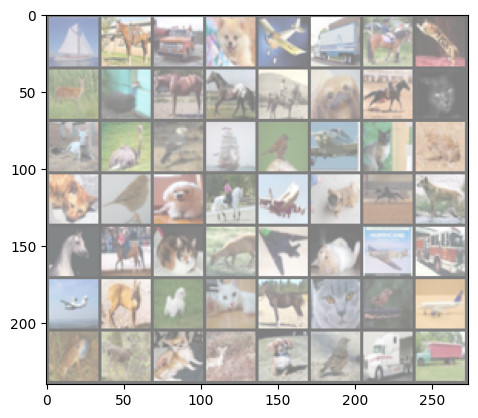

In [36]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
batch_size = 56
trainset = torchvision.datasets.CIFAR10(root='./', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

In [17]:
class mynetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.lay1 = nn.Linear(3*32*32 , 512)
    self.lay2 = nn.Linear(512 , 256)
    self.lay3 = nn.Linear(256 , 128)
    self.lay4 = nn.Linear(128 , 10)

  def forward(self , x):

    x_flat = x.view(x.shape[0] , -1)
    y1 = self.lay1(x_flat)
    y2 = self.lay2(y1)
    y3 = self.lay3(y2)
    y4 = self.lay4(y3)
    return y4

network = mynetwork()

In [18]:
from torch.optim import SGD

opt = SGD(network.parameters() ,lr= 0.001)
loss_fuction = nn.CrossEntropyLoss()


for batch in loader:
  inputs = batch[0]
  targets = batch[1]

  y = network(inputs)
  loss_value = loss_fuction(y , targets)

  loss_value.backward()

  opt.step()

  print(f"loss: {loss_value.item()}")


loss: 2.315483570098877
loss: 2.3100013732910156
loss: 2.300499677658081
loss: 2.2972617149353027
loss: 2.3053293228149414
loss: 2.2874913215637207
loss: 2.3118367195129395
loss: 2.3105154037475586
loss: 2.2951197624206543
loss: 2.2780144214630127
loss: 2.300990104675293
loss: 2.2958433628082275
loss: 2.3025925159454346
loss: 2.291616201400757
loss: 2.3138904571533203
loss: 2.2948124408721924
loss: 2.3095691204071045
loss: 2.300299882888794
loss: 2.291564464569092
loss: 2.2831132411956787
loss: 2.278066635131836
loss: 2.2989213466644287
loss: 2.2869410514831543
loss: 2.2865312099456787
loss: 2.2876622676849365
loss: 2.2788710594177246
loss: 2.279311418533325
loss: 2.284123182296753
loss: 2.27549147605896
loss: 2.289276599884033
loss: 2.2783043384552
loss: 2.2787981033325195
loss: 2.2799179553985596
loss: 2.260765314102173
loss: 2.2878334522247314
loss: 2.2621819972991943
loss: 2.263221025466919
loss: 2.2465150356292725
loss: 2.273149251937866
loss: 2.2716240882873535
loss: 2.2986009120